# Library Imports

In [1]:
import sys
import os
directory_path = os.path.abspath(os.path.join('..'))
utils_path = os.path.abspath(os.path.join('../utils'))
if directory_path not in sys.path:
    sys.path.append(directory_path)
    sys.path.append(utils_path)

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import datetime
import pytz
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from utils.Validator import *
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Load + Transform

## Users

In [3]:
df_users = pd.read_csv(r"../data/raw/Users.csv",dtype=str)
df_users.head()

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
0,1,kaggleteam,Kaggle Team,03/24/2011,5
1,368,antgoldbloom,Anthony Goldbloom,01/20/2010,2
2,381,iguyon,Isabelle,01/29/2010,2
3,383,davidstephan,David Stephan,02/01/2010,0
4,384,gabewarren,Gabe Warren,02/02/2010,0


In [4]:
df_users[df_users["UserName"]=="jsuasnabar"]

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
2537706,2761716,jsuasnabar,Joshua Suasnabar,01/30/2019,0


In [5]:
df_users[df_users["Id"]=="368"]

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
1,368,antgoldbloom,Anthony Goldbloom,01/20/2010,2


In [6]:
Validator.validar_categorico(df_users,["Id","UserName","DisplayName"])

,Variable,n,Missing,%Missing,Unico
0,Id,10087437,0,0.000000,10087437
0,UserName,10087437,1,0.000010,10087436
0,DisplayName,10087437,219,0.002171,8517586


In [7]:
df_users[df_users["UserName"].isnull()].head()

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
142096,159982,NaN,محـســــــــنـــــــــ ایــــــــمانیـــــــــ,01/27/2014,0


In [8]:
df_users['UserName'] = df_users['UserName'].fillna(df_users['DisplayName'])


In [9]:
Validator.validar_categorico(df_users,["Id","UserName","DisplayName"])

,Variable,n,Missing,%Missing,Unico
0,Id,10087437,0,0.000000,10087437
0,UserName,10087437,0,0.000000,10087437
0,DisplayName,10087437,219,0.002171,8517586


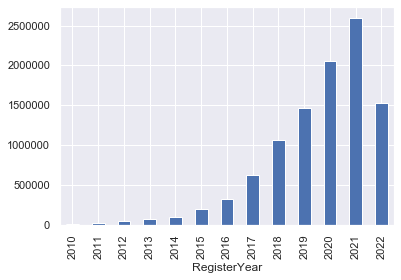

In [10]:
df_users["RegisterDate"] = pd.to_datetime(df_users["RegisterDate"])#.astype("datetime64")
df_users["RegisterYear"] = df_users["RegisterDate"].dt.year
df_users.groupby(["RegisterYear"])["RegisterYear"].count().plot(kind="bar")

In [11]:
df_users["PerformanceTier"].value_counts()

0    9893236
1     180535
2      11167
3       2096
4        349
5         54
Name: PerformanceTier, dtype: int64

In [12]:
df_users["PerformanceTier"].value_counts(normalize=True)

0    0.980748
1    0.017897
2    0.001107
3    0.000208
4    0.000035
5    0.000005
Name: PerformanceTier, dtype: float64

In [13]:
pd.crosstab(df_users['PerformanceTier'], df_users['RegisterYear'])

RegisterYear,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
PerformanceTier,,,,,,,,,,,,,
0,3211,16712,39328,57480,90271,178588,312437,602156,1046156,1441129,2017520,2567425,1520823
1,1094,3696,5859,7505,9995,13716,11569,14629,20003,23739,31838,32268,4624
2,137,270,488,507,684,940,966,1382,1619,1527,1529,1009,109
3,55,114,233,186,206,202,203,272,239,176,140,66,4
4,19,31,35,20,23,43,48,67,27,22,10,3,1
5,2,2,2,1,2,2,2,8,12,5,2,8,6


*PerformanceTier: https://www.kaggle.com/progression*
* 0 = Novice
* 1 = Contributor
* 2 = Expert
* 3 = Master
* 4 = Grandmaster
* 5 = Kaggle Team

In [14]:
df_users_i = df_users.copy()
df_users_i = df_users_i[df_users_i["PerformanceTier"].isin(["0","1","2","3","4"])]
df_users_i = df_users_i[["Id","UserName","DisplayName","PerformanceTier","RegisterDate","RegisterYear"]]
df_users_i.rename(columns = {'Id':'UserId'}, inplace = True)
df_users_i["PerformanceTier"].value_counts()

0    9893236
1     180535
2      11167
3       2096
4        349
Name: PerformanceTier, dtype: int64

In [15]:
df_users_i["PerformanceTier"].value_counts(normalize=True)

0    0.980753
1    0.017897
2    0.001107
3    0.000208
4    0.000035
Name: PerformanceTier, dtype: float64

In [16]:
Validator.validar_numerico(df_users_i,["RegisterYear"])

,Variable,n,Missing,%Missing,Negativo,%Negativo,Zero,%Zero,Unico,Media,Min,Max,IQRMAX,3STD,P10,P25,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,RegisterYear,10087383,0,0.0,0,0.0,0,0.0,13,2019.62907,2010,2022,2024.0,2025.647773,2017.0,2019.0,2020.0,2021.0,2022.0,2022.0,2022.0,431648,4.279088,0,0.0,0,0.0,0,0.0,0,0.0


In [17]:
date_format = '%Y-%m-%d %H:%M:%S'
my_date = datetime.datetime(2022, 6, 30)
df_users_i['Today'] = my_date
df_users_i.head()

,UserId,UserName,DisplayName,PerformanceTier,RegisterDate,RegisterYear,Today
1,368,antgoldbloom,Anthony Goldbloom,2,2010-01-20,2010,2022-06-30
2,381,iguyon,Isabelle,2,2010-01-29,2010,2022-06-30
3,383,davidstephan,David Stephan,0,2010-02-01,2010,2022-06-30
4,384,gabewarren,Gabe Warren,0,2010-02-02,2010,2022-06-30
5,385,demonjosh,Demon Josh,0,2010-02-02,2010,2022-06-30


In [18]:
# Creamos la variable antiguedad en meses
df_users_i['seniority_months'] = ((df_users_i.Today - df_users_i.RegisterDate)/np.timedelta64(1, 'M'))
df_users_i['seniority_months'] = round((df_users_i['seniority_months']/12),2)
df_users_i.head()

,UserId,UserName,DisplayName,PerformanceTier,RegisterDate,RegisterYear,Today,seniority_months
1,368,antgoldbloom,Anthony Goldbloom,2,2010-01-20,2010,2022-06-30,12.44
2,381,iguyon,Isabelle,2,2010-01-29,2010,2022-06-30,12.42
3,383,davidstephan,David Stephan,0,2010-02-01,2010,2022-06-30,12.41
4,384,gabewarren,Gabe Warren,0,2010-02-02,2010,2022-06-30,12.41
5,385,demonjosh,Demon Josh,0,2010-02-02,2010,2022-06-30,12.41


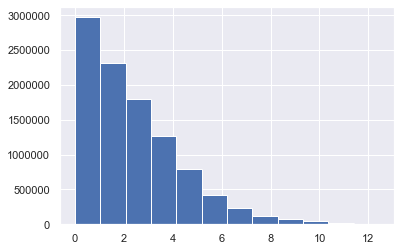

In [19]:
df_users_i["seniority_months"].hist(bins=12)

In [20]:
df_users_i["seniority_months"].quantile([0,0.2,0.4,0.6,0.8,1])

0.0     0.00
0.2     0.66
0.4     1.44
0.6     2.41
0.8     3.82
1.0    12.44
Name: seniority_months, dtype: float64

In [21]:
# Creamos variable cateogorica de seniority
conditions = [
    (df_users_i['seniority_months'] <= 0.5), # 6 meses
    (df_users_i['seniority_months'] > 0.5) & (df_users_i['seniority_months'] <= 1), #6 meses - anio y medio
    (df_users_i['seniority_months'] > 1) & (df_users_i['seniority_months'] <= 2),
    (df_users_i['seniority_months'] > 2) & (df_users_i['seniority_months'] <= 3),
    (df_users_i['seniority_months'] > 3) & (df_users_i['seniority_months'] <= 4),
    (df_users_i['seniority_months'] > 4)
    ]

values = ['0_05','05_1', '1_2', '2_3', '3_4','4_mas']

df_users_i['Seniority_Cat'] = np.select(conditions, values)

In [22]:
df_users_i['Seniority_Cat'].value_counts(normalize=True)

1_2      0.222074
4_mas    0.183244
2_3      0.180082
0_05     0.153494
05_1     0.134435
3_4      0.126670
Name: Seniority_Cat, dtype: float64

*PerformanceTier: https://www.kaggle.com/progression*
* 0 = Novice
* 1 = Contributor
* 2 = Expert
* 3 = Master
* 4 = Grandmaster
* 5 = Kaggle Team

In [23]:
# Creamos variable cateogorica de PerformanceTier
conditions = [
    (df_users_i['PerformanceTier'] == "0"), # 6 meses
    (df_users_i['PerformanceTier'] == "1"), # 6 meses
    (df_users_i['PerformanceTier'] == "2"), # 6 meses
    (df_users_i['PerformanceTier'] == "3"), # 6 meses
    (df_users_i['PerformanceTier'] == "4"), # 6 meses
    ]

values = ['Novice','Contributor', 'Expert', 'Master', 'Grandmaster']

df_users_i['PerformanceTier_Cat'] = np.select(conditions, values)

In [24]:
df_users_i['PerformanceTier_Cat'].value_counts(normalize=True)

Novice         0.980753
Contributor    0.017897
Expert         0.001107
Master         0.000208
Grandmaster    0.000035
Name: PerformanceTier_Cat, dtype: float64

In [25]:
df_users_i = df_users_i[["UserId","UserName","DisplayName","PerformanceTier_Cat","Seniority_Cat"]]
df_users_i.head()

,UserId,UserName,DisplayName,PerformanceTier_Cat,Seniority_Cat
1,368,antgoldbloom,Anthony Goldbloom,Expert,4_mas
2,381,iguyon,Isabelle,Expert,4_mas
3,383,davidstephan,David Stephan,Novice,4_mas
4,384,gabewarren,Gabe Warren,Novice,4_mas
5,385,demonjosh,Demon Josh,Novice,4_mas


In [26]:
df_users_i.to_csv(r"../data/interim/Users.csv",index=False)

## User Followers

In [27]:
df_user_followers = pd.read_csv(r"../data/raw/UserFollowers.csv",dtype=str)
df_user_followers.head()

,Id,UserId,FollowingUserId,CreationDate
0,64,368,993,05/23/2017
1,122289,368,67483,08/07/2018
2,323230,368,1663522,09/18/2019
3,412502,368,1302389,03/08/2020
4,447841,368,391404,04/27/2020


* UserId = Seguidor
* FollowingUserId = Usuario Principal

In [28]:
df_user_followers = df_user_followers[["UserId","FollowingUserId"]]
df_user_followers.rename(columns = {'UserId':'FollowerUserId','FollowingUserId':'UserId'}, inplace = True)
df_user_followers.head()

,FollowerUserId,UserId
0,368,993
1,368,67483
2,368,1663522
3,368,1302389
4,368,391404


In [29]:
print(df_user_followers.shape)
print(df_users_i.shape)

(967118, 2)
(10087383, 5)


In [30]:
int_df_user_followers = pd.merge(df_users_i, df_user_followers, how='inner', on=['UserId'])
print(int_df_user_followers.shape)

(927918, 6)


In [31]:
df_user_followers_i = int_df_user_followers[["UserId","FollowerUserId"]]
df_user_followers_i.to_csv(r"../data/interim/UserFollowers.csv",index=False)
#df_user_followers.to_csv(r"../data/interim/UserFollowers.csv",index=False)

## User Achievements

In [32]:
df_users_i = pd.read_csv(r"../data/interim/Users.csv",dtype=str)

In [33]:
df_user_achievements = pd.read_csv(r"../data/raw/UserAchievements.csv",dtype=str)
df_user_achievements.head()

,Id,UserId,AchievementType,Tier,TierAchievementDate,Points,CurrentRanking,HighestRanking,TotalGold,TotalSilver,TotalBronze
0,3739822,1,Discussion,1,11/06/2019,0,NaN,3,0,0,14
1,3916402,1,Competitions,1,11/06/2019,0,NaN,NaN,0,0,0
2,3739823,368,Competitions,1,07/15/2016,232,NaN,75,0,0,0
3,3739824,368,Scripts,2,09/21/2016,41,2054,2005,0,3,13
4,3739825,368,Discussion,2,08/30/2016,218,337,337,14,13,139


In [34]:
df_user_achievements[df_user_achievements["UserId"]=="368"]

,Id,UserId,AchievementType,Tier,TierAchievementDate,Points,CurrentRanking,HighestRanking,TotalGold,TotalSilver,TotalBronze
2,3739823,368,Competitions,1,07/15/2016,232,NaN,75,0,0,0
3,3739824,368,Scripts,2,09/21/2016,41,2054,2005,0,3,13
4,3739825,368,Discussion,2,08/30/2016,218,337,337,14,13,139
10942060,122435030,368,Datasets,2,11/06/2019,79,171,161,1,3,6


In [35]:
df_user_achievements = df_user_achievements[["UserId","AchievementType","Points","TotalGold","TotalSilver","TotalBronze"]]
df_user_achievements.head()

,UserId,AchievementType,Points,TotalGold,TotalSilver,TotalBronze
0,1,Discussion,0,0,0,14
1,1,Competitions,0,0,0,0
2,368,Competitions,232,0,0,0
3,368,Scripts,41,0,3,13
4,368,Discussion,218,14,13,139


In [36]:
int_df_user_achievements = pd.merge(df_users_i, df_user_achievements, how='inner', on=['UserId'])
print(int_df_user_achievements.shape)

MemoryError: 

In [ ]:
df_user_achievements_i = int_df_user_achievements[["UserId","AchievementType","Points","TotalGold","TotalSilver","TotalBronze"]]

In [ ]:
df_user_achievements_i["AchievementType"].unique()

In [ ]:
print(df_user_achievements_i.shape)

In [ ]:
df_user_achievements_i["Points"] = df_user_achievements_i["Points"].astype(float)
df_user_achievements_i["TotalGold"] = df_user_achievements_i["TotalGold"].astype(float)
df_user_achievements_i["TotalSilver"] = df_user_achievements_i["TotalSilver"].astype(float)
df_user_achievements_i["TotalBronze"] = df_user_achievements_i["TotalBronze"].astype(float)

df_ach_comp = df_user_achievements_i[df_user_achievements_i["AchievementType"]=="Competitions"]
df_ach_scri = df_user_achievements_i[df_user_achievements_i["AchievementType"]=="Scripts"]
df_ach_disc = df_user_achievements_i[df_user_achievements_i["AchievementType"]=="Discussion"]
df_ach_data = df_user_achievements_i[df_user_achievements_i["AchievementType"]=="Datasets"]

df_ach_comp.drop(['AchievementType'], axis=1,inplace=True)
df_ach_scri.drop(['AchievementType'], axis=1,inplace=True)
df_ach_disc.drop(['AchievementType'], axis=1,inplace=True)
df_ach_data.drop(['AchievementType'], axis=1,inplace=True)

df_ach_comp.rename(columns = {'TotalGold':'TotalGold_Comp','TotalSilver':'TotalSilver_Comp','TotalBronze':'TotalBronze_Comp','Points':'Points_Comp'}, inplace = True)
df_ach_scri.rename(columns = {'TotalGold':'TotalGold_Scri','TotalSilver':'TotalSilver_Scri','TotalBronze':'TotalBronze_Scri','Points':'Points_Scri'}, inplace = True)
df_ach_disc.rename(columns = {'TotalGold':'TotalGold_Disc','TotalSilver':'TotalSilver_Disc','TotalBronze':'TotalBronze_Disc','Points':'Points_Disc'}, inplace = True)
df_ach_data.rename(columns = {'TotalGold':'TotalGold_Data','TotalSilver':'TotalSilver_Data','TotalBronze':'TotalBronze_Data','Points':'Points_Data'}, inplace = True)

print(df_ach_comp.shape)
print(df_ach_scri.shape)
print(df_ach_disc.shape)
print(df_ach_data.shape)

In [ ]:
df_ach_fin = df_ach_comp.merge(df_ach_scri,how ='left',on="UserId").merge(df_ach_disc,how ='left',on="UserId").merge(df_ach_data,how ='left',on="UserId")
df_ach_fin.shape

In [ ]:
Validator.validar_numerico(df_ach_fin,["Points_Comp","Points_Scri","Points_Disc","Points_Data",
                                       "TotalGold_Comp","TotalGold_Scri","TotalGold_Disc","TotalGold_Data",
                                       "TotalSilver_Comp","TotalSilver_Scri","TotalSilver_Disc","TotalSilver_Data",
                                       "TotalBronze_Comp","TotalBronze_Scri","TotalBronze_Disc","TotalBronze_Data"
                                    ])

In [ ]:
df_ach_fin[df_ach_fin["TotalGold_Disc"]==436]

In [ ]:
df_user_achievements[df_user_achievements["UserId"]=="75976"]

In [ ]:
df_users_i[df_users_i["UserId"] == "75976"]

In [ ]:
del df_ach_comp,df_ach_scri,df_ach_disc,df_ach_data,df_user_achievements_i,int_df_user_achievements,df_user_achievements,df_users_i

In [ ]:
df_ach_fin.to_csv(r"../data/interim/UserAchievements.csv",index=False)

In [ ]:
del df_ach_fin

## Competitions

In [37]:
df_competitions = pd.read_csv(r"../data/raw/Competitions.csv",dtype=str)

In [38]:
df_competitions.head(5)

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,CompetitionTypeId,HostName,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,TeamMergerDeadlineDate,TeamModelDeadlineDate,ModelSubmissionDeadlineDate,FinalLeaderboardHasBeenVerified,HasKernels,OnlyAllowKernelSubmissions,HasLeaderboard,LeaderboardPercentage,LeaderboardDisplayFormat,EvaluationAlgorithmAbbreviation,EvaluationAlgorithmName,EvaluationAlgorithmDescription,EvaluationAlgorithmIsMax,ValidationSetName,ValidationSetValue,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,BanTeamMergers,EnableTeamModels,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions
0,2408,Eurovision2010,Forecast Eurovision Voting,This competition requires contestants to forec...,Featured,2,NaN,1,NaN,04/07/2010 07:57:43,05/25/2010 18:00:00,NaN,NaN,NaN,NaN,True,True,False,False,10,0.00000,AE,Absolute Error,Total sum of absolute value of each individual...,False,NaN,NaN,5,5,20,False,False,False,False,USD,1000.0000,1,1,False,22,25,22
1,2435,hivprogression,Predict HIV Progression,This contest requires competitors to predict t...,Featured,1,NaN,1,NaN,04/27/2010 21:29:09,08/02/2010 12:32:00,NaN,NaN,NaN,NaN,True,True,False,True,30,0.00000,MCE,Mean Consequential Error,Averages consequential error (i.e. if predicti...,True,Boolean,"{0, 1}",4,4,20,False,False,False,False,USD,500.0000,1,1,True,107,116,855
2,2438,worldcup2010,World Cup 2010 - Take on the Quants,Quants at Goldman Sachs and JP Morgan have mod...,Featured,NaN,NaN,1,NaN,06/03/2010 08:08:08,06/11/2010 13:29:00,NaN,NaN,NaN,NaN,True,True,False,False,10,0.00000,Custom,Custom Evaluation Metric,A placeholder that indicates a custom algorith...,False,NaN,NaN,5,5,20,False,False,False,False,USD,100.0000,1,0.5,False,0,0,0
3,2439,informs2010,INFORMS Data Mining Contest 2010,The goal of this contest is to predict short t...,Featured,4,NaN,1,NaN,06/21/2010 21:53:25,10/10/2010 02:28:00,NaN,NaN,NaN,NaN,True,True,False,True,10,0.00000,AUC,Area Under Receiver Operating Characteristic C...,Measures discrimination. Calculates how well a...,True,A real number,"(-Infinity, Infinity)",5,5,20,False,False,False,False,USD,0.0000,1,1,True,145,153,1483
4,2442,worldcupconf,World Cup 2010 - Confidence Challenge,The Confidence Challenge requires competitors ...,Featured,3,NaN,1,NaN,06/03/2010 08:08:08,06/11/2010 13:28:00,NaN,NaN,NaN,NaN,True,True,False,False,10,0.00000,Custom,Custom Evaluation Metric,A placeholder that indicates a custom algorith...,False,NaN,NaN,5,5,20,False,False,False,False,USD,100.0000,1,0.5,False,63,64,63


In [39]:
df_competitions[df_competitions["Slug"].str.contains("tabular-playground-series-jan-2022")]

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,CompetitionTypeId,HostName,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,TeamMergerDeadlineDate,TeamModelDeadlineDate,ModelSubmissionDeadlineDate,FinalLeaderboardHasBeenVerified,HasKernels,OnlyAllowKernelSubmissions,HasLeaderboard,LeaderboardPercentage,LeaderboardDisplayFormat,EvaluationAlgorithmAbbreviation,EvaluationAlgorithmName,EvaluationAlgorithmDescription,EvaluationAlgorithmIsMax,ValidationSetName,ValidationSetValue,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,BanTeamMergers,EnableTeamModels,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions
4973,33101,tabular-playground-series-jan-2022,Tabular Playground Series - Jan 2022,Practice your ML skills on this approachable d...,Playground,1801833,4,1,NaN,01/01/2022 02:37:30,01/31/2022 23:59:00,NaN,NaN,NaN,NaN,True,True,False,True,25,0.00000,SMAPE,SMAPE,Symmetric Mean Absolute Percentage Error,False,NaN,NaN,5,2,3,False,False,False,False,Swag,NaN,1,0,False,1591,1646,16151


In [40]:
df_competitions = df_competitions[["Id","Title","ForumId","TotalTeams"]]
df_competitions.head()

,Id,Title,ForumId,TotalTeams
0,2408,Forecast Eurovision Voting,2,22
1,2435,Predict HIV Progression,1,107
2,2438,World Cup 2010 - Take on the Quants,NaN,0
3,2439,INFORMS Data Mining Contest 2010,4,145
4,2442,World Cup 2010 - Confidence Challenge,3,63


In [41]:
df_competitions["TotalTeams"] = df_competitions["TotalTeams"].astype(int)
Validator.validar_numerico(df_competitions,["TotalTeams"])

,Variable,n,Missing,%Missing,Negativo,%Negativo,Zero,%Zero,Unico,Media,Min,Max,IQRMAX,3STD,P10,P25,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,TotalTeams,5485,0,0.0,0,0.0,961,17.52051,584,110.429717,0,8751,97.0,1391.078645,0.0,2.0,12.0,40.0,150.0,527.8,2120.48,716,13.053783,112,2.041933,547,9.972653,275,5.013674,55,1.002735


In [42]:
Validator.validar_categorico(df_competitions,["Id","Title","ForumId"])

,Variable,n,Missing,%Missing,Unico
0,Id,5485,0,0.000000,5485
0,Title,5485,0,0.000000,5108
0,ForumId,5485,7,0.127621,5476


In [43]:
df_competitions.rename(columns = {'Id':'CompetitionId'}, inplace = True)
df_competitions[df_competitions["ForumId"].isna()]

,CompetitionId,Title,ForumId,TotalTeams
2,2438,World Cup 2010 - Take on the Quants,NaN,0
23,2552,UCL CoMPLEX MRes module,NaN,22
24,2554,UCL Applied Machine Learning 2,NaN,16
26,2558,UMICH SI650 - Sentiment Classification,NaN,28
27,2559,Erasmus University Rotterdam - Econometrie 2 ...,NaN,44
88,3273,Price Change Prediction of Electronics in Onli...,NaN,29
94,3321,Getting Started,NaN,0


In [44]:
df_competitions = df_competitions[~df_competitions["ForumId"].isna()]

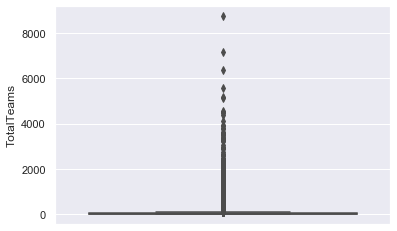

In [45]:
sns.boxplot( y='TotalTeams', data=df_competitions)
plt.show()

In [46]:
df_competitions.head()

,CompetitionId,Title,ForumId,TotalTeams
0,2408,Forecast Eurovision Voting,2,22
1,2435,Predict HIV Progression,1,107
3,2439,INFORMS Data Mining Contest 2010,4,145
4,2442,World Cup 2010 - Confidence Challenge,3,63
5,2445,Predict Grant Applications,30,203


In [47]:
df_competitions.to_csv(r"../data/interim/Competitions.csv",index=False)

## Competitions Tags

In [48]:
df_comp_tags = pd.read_csv(r"../data/raw/CompetitionTags.csv",dtype=str)
df_comp_tags.head()

,Id,CompetitionId,TagId
0,126,3486,14102
1,336,3526,12116
2,335,3526,14101
3,334,3526,14104
4,362,3706,2606


In [49]:
df_comp_tags = df_comp_tags[["CompetitionId","TagId"]]

In [50]:
Validator.validar_categorico(df_comp_tags, ["CompetitionId","TagId"])


,Variable,n,Missing,%Missing,Unico
0,CompetitionId,686,0,0.0,314
0,TagId,686,0,0.0,101


In [51]:
df_comp_tags["TagId"].value_counts()

14101    116
14102    103
14202     44
14104     39
14201     32
14203     18
12116     18
2606      16
4141      14
7301      13
13207     11
7306      11
7100       9
11129      9
4202       9
13209      9
13204      8
13203      8
16575      8
11108      7
15002      7
16113      6
12028      6
16072      5
12402      5
1219       5
11208      5
2107       4
2507       4
14105      4
        ... 
8301       1
13313      1
11204      1
16010      1
7307       1
12016      1
11104      1
12404      1
7202       1
16409      1
16221      1
11211      1
12038      1
11102      1
16627      1
2400       1
16373      1
4309       1
7200       1
16382      1
12400      1
4302       1
8100       1
16609      1
2206       1
9109       1
2502       1
7105       1
13404      1
11130      1
Name: TagId, Length: 101, dtype: int64

In [52]:
df_comp_tags.to_csv(r"../data/interim/CompetitionTags.csv",index=False)

## Teams

In [53]:
df_teams = pd.read_csv(r"../data/raw/Teams.csv",dtype=str)
df_teams.head()

MemoryError: 

In [ ]:
df_teams = df_teams[["Id","CompetitionId","TeamLeaderId","TeamName","Medal","PrivateLeaderboardRank"]]
df_teams.head()

In [ ]:
df_teams.info()

In [ ]:
Validator.validar_categorico(df_teams, ["Medal","PrivateLeaderboardRank"])

In [ ]:
df_teams["Medal"] = df_teams["Medal"].astype(float)
df_teams["PrivateLeaderboardRank"] = df_teams["PrivateLeaderboardRank"].astype(float)
Validator.validar_numerico(df_teams, ["Medal","PrivateLeaderboardRank"])

In [ ]:
df_teams.rename(columns = {'Id':'TeamId'}, inplace = True)
df_teams.head()


In [ ]:
df_teams.to_csv(r"../data/interim/Teams.csv",index=False)

## Team Memberships

In [ ]:
df_team_member = pd.read_csv(r"../data/raw/TeamMemberships.csv",dtype=str)
df_team_member.head()

In [ ]:
df_team_member = df_team_member[["TeamId","UserId"]]
df_team_member.head()

In [ ]:
df_team_user = pd.merge(df_team_member, df_teams, how='inner', on=['TeamId'])
df_team_user = df_team_user[["CompetitionId","UserId","Medal"]]
df_team_user.head()


In [ ]:
df_team_user.shape

In [ ]:
df_team_user["Medal"].fillna(0,inplace=True)
df_team_user.drop_duplicates(inplace=True)
df_team_user.shape

In [ ]:
df_team_user["Podio"] = np.where(df_team_user["Medal"]>0,1,0)
df_team_user["Podio"].value_counts()

In [ ]:
df_team_user.head()

In [ ]:
df_grouped_userteam = df_team_user.groupby("UserId").Podio.agg(['count','sum']).reset_index()
df_grouped_userteam.rename(columns={'count':'competencias','sum':'competencias_premiadas'},inplace=True)


In [ ]:
df_grouped_userteam["ratio_competencias_premiadas"] = df_grouped_userteam["competencias_premiadas"] / df_grouped_userteam["competencias"]
df_grouped_userteam.sort_values("competencias_premiadas",ascending=False).head()

In [ ]:
df_grouped_userteam.to_csv(r"../data/interim/UserParticipantInfo.csv",index=False)

In [ ]:
Validator.validar_categorico(df_team_member, ['TeamId', 'UserId'])

In [ ]:
df_team_member.to_csv(r"../data/interim/TeamMemberships.csv",index=False)

## Tags

In [ ]:
df_tags = pd.read_csv(r"../data/raw/Tags.csv",dtype=str)
df_tags.head()

In [ ]:
df_tags = df_tags[["Id","ParentTagId","Name"]]
df_tags.rename(columns = {'Id':'TagId'}, inplace = True)
df_tags.head()

In [ ]:
Validator.validar_categorico(df_tags, ["TagId","ParentTagId","Name"])

In [ ]:
df_tags.to_csv(r"../data/interim/Tags.csv",index=False)

## Datasets

In [ ]:
df_datasets = pd.read_csv(r"../data/raw/Datasets.csv",dtype=str)
df_datasets.head()

In [ ]:
df_datasets = df_datasets[["Id","CreatorUserId","ForumId","Type","TotalViews","TotalDownloads"]]
df_datasets.head()

In [ ]:
df_dataset_cont = df_datasets.groupby(["CreatorUserId"]).Id.size().reset_index()
df_dataset_cont.rename(columns={'CreatorUserId':'UserId','Id':'Datasets'},inplace=True)
df_dataset_cont.sort_values("Datasets",ascending=False).head()

In [ ]:
df_dataset_cont.to_csv(r"../data/interim/UserDataContInfo.csv",index=False)

In [ ]:
df_datasets["Type"].value_counts()

In [ ]:
df_datasets = df_datasets[["Id","ForumId","TotalViews","TotalDownloads"]]
df_datasets.rename(columns={"Id":"DatasetId"},inplace=True)
df_datasets.head()

In [ ]:
Validator.validar_categorico(df_datasets, ["DatasetId","ForumId"])

In [ ]:
df_datasets["TotalViews"] = df_datasets["TotalViews"].astype(int)
df_datasets["TotalDownloads"] = df_datasets["TotalDownloads"].astype(int)
Validator.validar_numerico(df_datasets, ["TotalViews","TotalDownloads"])

In [ ]:
df_datasets.to_csv(r"../data/interim/Datasets.csv",index=False)

## Dataset Tags

In [ ]:
df_dataset_tags = pd.read_csv(r"../data/raw/DatasetTags.csv",dtype=str)
df_dataset_tags.head()

In [ ]:
df_dataset_tags = df_dataset_tags[["DatasetId","TagId"]]
Validator.validar_categorico(df_dataset_tags, df_dataset_tags.columns)

In [ ]:
df_dataset_tags.to_csv(r"../data/interim/DatasetTags.csv",index=False)

## Forums

In [ ]:
df_forums = pd.read_csv(r"../data/raw/Forums.csv",dtype=str)
df_forums.head()

In [ ]:
df_forums.rename(columns={"Id":"ForumId"},inplace=True)
Validator.validar_categorico(df_forums, df_forums.columns)

In [ ]:
df_forums[df_forums["ParentForumId"].isna()].head()

In [ ]:
df_forums.to_csv(r"../data/interim/Forums.csv",index=False)

## ForumsTopics

In [ ]:
df_forum_topics = pd.read_csv(r"../data/raw/ForumTopics.csv",dtype=str)
df_forum_topics.head()

In [ ]:
df_forum_topics[df_forum_topics["ForumId"]=="44"].head()

In [ ]:
df_competitions[df_competitions["Title"].str.contains("Google Smartphone")]

In [ ]:
df_datasets[df_datasets["ForumId"]=="1355813"]

In [ ]:
df_forums[df_forums["ForumId"]=="1355813"]

In [ ]:
df_forum_topics = df_forum_topics[["Id","ForumId","Title","TotalViews","TotalMessages","Score"]]
df_forum_topics.rename(columns={"Id":"ForumTopicId"},inplace=True)
df_forum_topics.head()

In [ ]:
df_forum_topics["TotalViews"] = df_forum_topics["TotalViews"].astype(float)
df_forum_topics["TotalMessages"] = df_forum_topics["TotalMessages"].astype(float)
df_forum_topics["Score"] = df_forum_topics["Score"].astype(float)
Validator.validar_numerico(df_forum_topics, ["TotalViews","TotalMessages","Score"])

In [ ]:
df_forum_topics[df_forum_topics["Score"]<0].head()

In [ ]:
Validator.validar_categorico(df_forum_topics, ["ForumId","Title"])

In [ ]:
df_forum_topics.to_csv(r"../data/interim/ForumTopics.csv",index=False)

## Forum Messages

In [ ]:
df_users_i = pd.read_csv(r"../data/interim/Users.csv",dtype=str)

In [ ]:
df_forum_messages = pd.read_csv(r"../data/raw/ForumMessages.csv",dtype=str)
df_forum_messages.head()

In [ ]:
df_forum_messages.shape

In [ ]:
df_messageinfouser = df_forum_messages.copy()
df_messageinfouser = df_messageinfouser[["PostUserId","Medal"]]
df_messageinfouser["Medal"].fillna(0,inplace=True)
df_messageinfouser["Medal"] = df_messageinfouser["Medal"].astype(int)
df_messageinfouser["Podio"] = np.where(df_messageinfouser["Medal"]>0,1,0)
df_messageinfouser.head()

In [ ]:
df_messageinfouser_g = df_messageinfouser.groupby("PostUserId").Podio.agg(['count','sum']).reset_index()
df_messageinfouser_g.rename(columns={'PostUserId':'UserId','count':'comentarios','sum':'comentarios_premiados'},inplace=True)
df_messageinfouser_g["ratio_comentarios_premiados"] = df_messageinfouser_g["comentarios_premiados"] / df_messageinfouser_g["comentarios"]
df_messageinfouser_g.head()

In [ ]:
df_messageinfouser_g.to_csv(r"../data/interim/UserComentsInfo.csv",index=False)

In [ ]:
df_forum_messages[df_forum_messages["ForumTopicId"]=="255635"]

In [ ]:
df_forum_messages = df_forum_messages[["ForumTopicId","PostUserId","Medal"]]
df_forum_messages.rename(columns={"PostUserId":"UserId"},inplace=True)
df_forum_messages.head()

In [ ]:
int_df_forum_messages = pd.merge(df_users_i, df_forum_messages, how='inner', on=['UserId'])
print(int_df_forum_messages.shape)

In [ ]:
df_forum_messages = int_df_forum_messages[["ForumTopicId","UserId","Medal"]]
df_forum_messages[df_forum_messages["Medal"]=="1"].head()

In [ ]:
df_forum_messages["Medal"] = df_forum_messages["Medal"].astype(float)
Validator.validar_numerico(df_forum_messages, ["Medal"])

In [ ]:
df_forum_messages.head()

In [ ]:
df_forum_messages.to_csv(r"../data/interim/ForumMessages.csv",index=False)